# Chest X-ray Pneumonia classification
 

In [1]:
#run this if drive not mounted USE teamenel645@gmail.com account
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


## 1) Downloading Kaggle data to drive

In [2]:
#DONT RUN AGAIN
# ! pip install -q kaggle
# from google.colab import files
# files.upload()


In [3]:
# ! mkdir ~/.kaggle

In [4]:
# ! cp kaggle.json ~/.kaggle/

In [5]:
#Changing permision to use my token to access kaggle
# ! chmod 600 ~/.kaggle/kaggle.json

In [6]:
# ! mkdir MyDrive/MyDrive/ENEL-645/data

In [7]:
# ! kaggle datasets list
# !kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

In [8]:
# ! unzip chest-xray-pneumonia.zip -d MyDrive/MyDrive/ENEL-645/data

## 2) Loading data into numpy array from drive

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
import glob
import matplotlib.pyplot as plt
from skimage import transform


In [10]:
#Loading test data
#DONT Run unless you want to re size
# data_dir_test='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/test/'
# images_test = np.asarray(glob.glob(data_dir_test + "/*/*.jpeg",recursive=True))
# labels_test = np.asarray([f.split("/")[-2] for f in images_test])



In [11]:
#Loading train data
# #DONT Run unless you want to re size
# data_dir_train='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/train/'
# images_train = np.asarray(glob.glob(data_dir_train + "/*/*.jpeg",recursive=True))
# labels_train = np.asarray([f.split("/")[-2] for f in images_train])

In [12]:
#Loading val data
#DONT Run unless you want to re size
# data_dir_val='MyDrive/MyDrive/ENEL-645/data/chest_xray/chest_xray/val/'
# images_val = np.asarray(glob.glob(data_dir_val + "/*/*.jpeg",recursive=True))
# labels_val = np.asarray([f.split("/")[-2] for f in images_val])

In [13]:
#Shuffling data
#DONT Run unless you want to re size
# from sklearn.utils import shuffle
# X_test,y_test = shuffle(images_test, labels_test, random_state=0)
# X_train,y_train = shuffle(images_train, labels_train, random_state=0)
# X_val,y_val = shuffle(images_val, labels_val, random_state=0)

In [14]:
# plt.figure(figsize = (20,20))
# for i in range(30):
#   plt.subplot(5,6,i+1) 
#   n=plt.imread(X_test[i])
#   plt.imshow(n,cmap="gray")
#   plt.title(y_test[i])
# plt.show

## 3) Pre-Processing


### 3.1) Resizing 

In [15]:
# Resizing 
#DONT RUN UNLESS YOU WANT TO RE-SIZE
# from skimage import transform
# from skimage import io
# img_height = 180
# img_width = 180
# #test data
# X_resized_test = np.zeros((len(X_test),img_height,img_width,1))
# for (ii,img) in enumerate(X_test):
#     X_resized_test[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))
# #train data
# X_resized_train = np.zeros((len(X_train),img_height,img_width,1))
# for (ii,img) in enumerate(X_train):
#     X_resized_train[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))
# #val data
# X_resized_val = np.zeros((len(X_val),img_height,img_width,1))
# for (ii,img) in enumerate(X_val):
#     X_resized_val[ii] = transform.resize(io.imread(img, as_gray=True),(img_height,img_width,1))

In [16]:
#Saving np arrays so we dont have to re-run the sizing again
#DONT RUN UNLESS YOU CHANGED THE SIZING
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/test',X_resized_test)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/test_label',y_test)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/train',X_resized_train)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/train_label',y_train)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/val',X_resized_val)
# np.save('MyDrive/MyDrive/ENEL-645/pre-processed/val_label',y_val)

In [17]:
#Loading np arrays
Xtest=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/test.npy')
ytest=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/test_label.npy')
Xtrain_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/train.npy')
ytrain_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/train_label.npy')
Xval_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/val.npy')
yval_actual=np.load('MyDrive/MyDrive/ENEL-645/pre-processed/val_label.npy')

In [18]:
#Resplitting the train-val data to hav 70/30 ratio
Xtrain_val=np.vstack((Xtrain_actual,Xval_actual))
Ytrain_val=np.concatenate((ytrain_actual,yval_actual))
Xtrain_val.shape

(5232, 180, 180, 1)

In [19]:
#Filtering the indexes of normal and pnemonia
pneumonia=np.where(Ytrain_val=='PNEUMONIA')
normal=np.where(Ytrain_val=='NORMAL')

In [20]:
import random
img_height = 180
img_width = 180
ln=len(normal[0])*2
#Createing np of equal proportion
X_filtered= np.zeros((ln,img_height,img_width,1))
Y_filtered=list(range(ln))

In [21]:
#Adding PNEUMONIA pics
for i in range(len(normal[0])):
  rand=random.choice(pneumonia[0])
  X_filtered[i]=Xtrain_val[rand]
  Y_filtered[i]=Ytrain_val[rand]


In [22]:
# Adding Normal
for i in range(len(normal[0]),ln):
  rand=random.choice(normal[0])
  X_filtered[i]=Xtrain_val[rand]
  Y_filtered[i]=Ytrain_val[rand]


In [23]:
#converting list to np
Y_filtered=np.array(Y_filtered)

In [24]:
#MAKE SURE to specify wheter to use filtered dataset or original
import sklearn
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(X_filtered,Y_filtered,test_size=0.3,shuffle=True,stratify=Y_filtered)

<function matplotlib.pyplot.show>

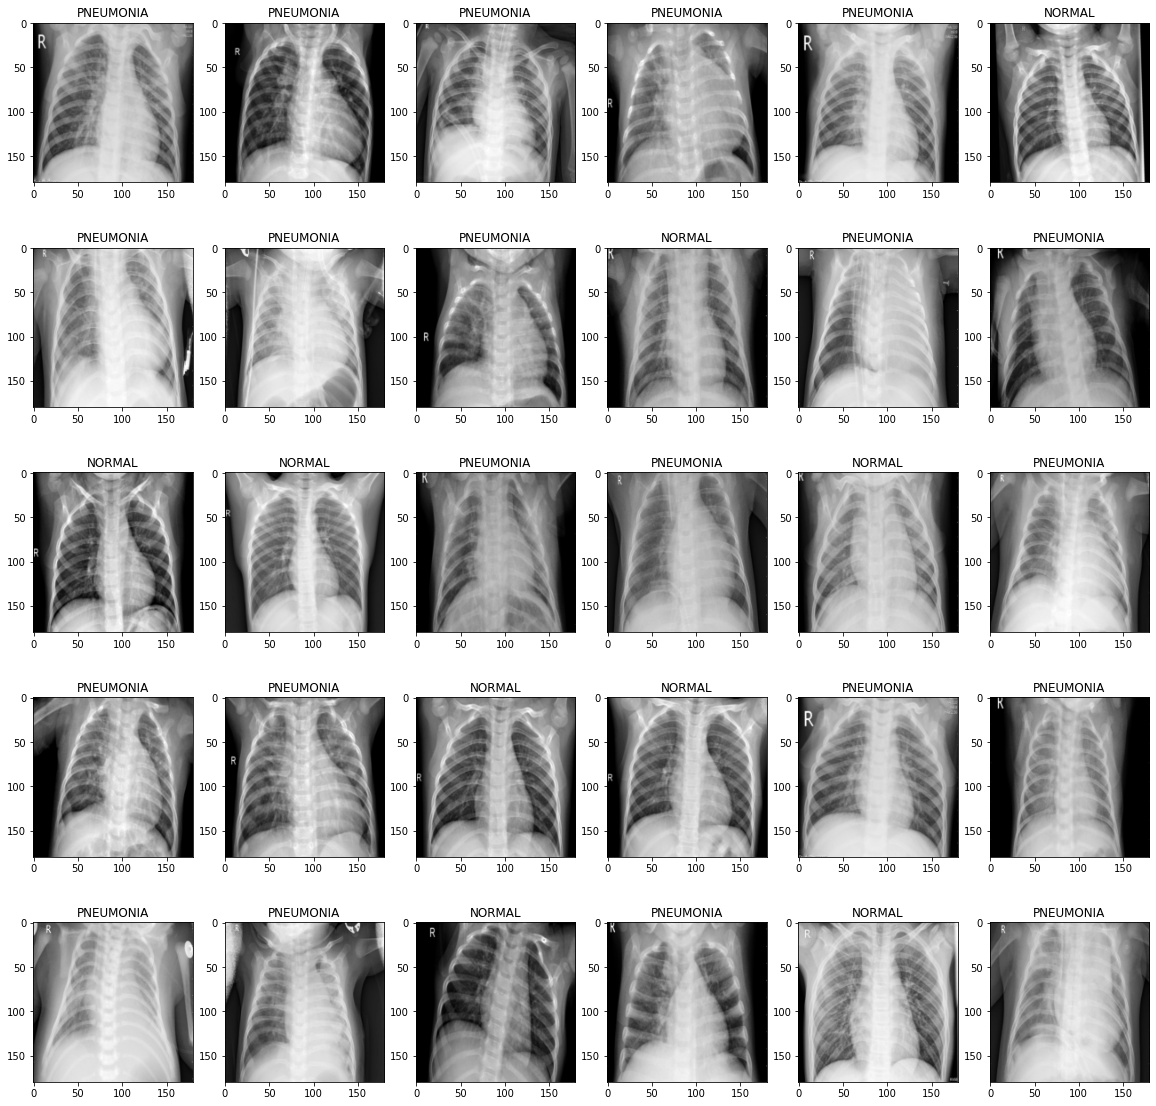

In [25]:
#Sample of resized data
##Imshow can either do 2d or RGM numpy arrays so i had to reshape inorder to display
b=Xtest.reshape(624,180,180)
plt.figure(figsize = (20,20))
for i in range(30):
  plt.subplot(5,6,i+1) 
  plt.imshow(b[i],cmap="gray")
  plt.title(ytest[i])
plt.show

### 3.2) Data scaling

In [26]:
# The data seems to be already scale dbetween 0 and 1, so we do nothing
print(Xtrain.min(),Xtrain.max(),Xtrain.mean(),Xtrain.std())
print(Xval.min(),Xval.max(),Xval.mean(),Xval.std())

0.0 1.0 0.47972801050861685 0.23864437507991698
0.0 1.0 0.475016428034807 0.2383747185076586


### 3.3) One Hot Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
##Converting labels to numbers
le=LabelEncoder()
le.fit(ytrain)
classes_names=[]
print("Label Encoding:\n1 is for label: ",le.inverse_transform([1]),"\n0 is for label: ",le.inverse_transform([0]))
ytrain_le=le.transform(ytrain)
ytest_le=le.transform(ytest)
yval_le=le.transform(yval)
##One hot encoding
Y_train_oh = to_categorical(ytrain_le)
Y_val_oh = to_categorical(yval_le)
Y_test_oh = to_categorical(ytest_le)
Y_test_oh[5]


Label Encoding:
1 is for label:  ['PNEUMONIA'] 
0 is for label:  ['NORMAL']


array([1., 0.], dtype=float32)

### 3.4) Data Augmentation

In [28]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
batch_size = 32
gen_params = {"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":20,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.2, "zoom_range":0.1,"horizontal_flip":True,"fill_mode":'constant',\
               "cval": 0}
train_gen = ImageDataGenerator(**gen_params)
val_gen = ImageDataGenerator(**gen_params)
# X_train_expanded=np.expand_dims(Xtrain,axis=3)
train_gen.fit(Xtrain,seed = 1)
val_gen.fit(Xval, seed = 1)

train_flow = train_gen.flow(Xtrain,Y_train_oh,batch_size = batch_size)
val_flow = val_gen.flow(Xval,Y_val_oh,batch_size = batch_size) 


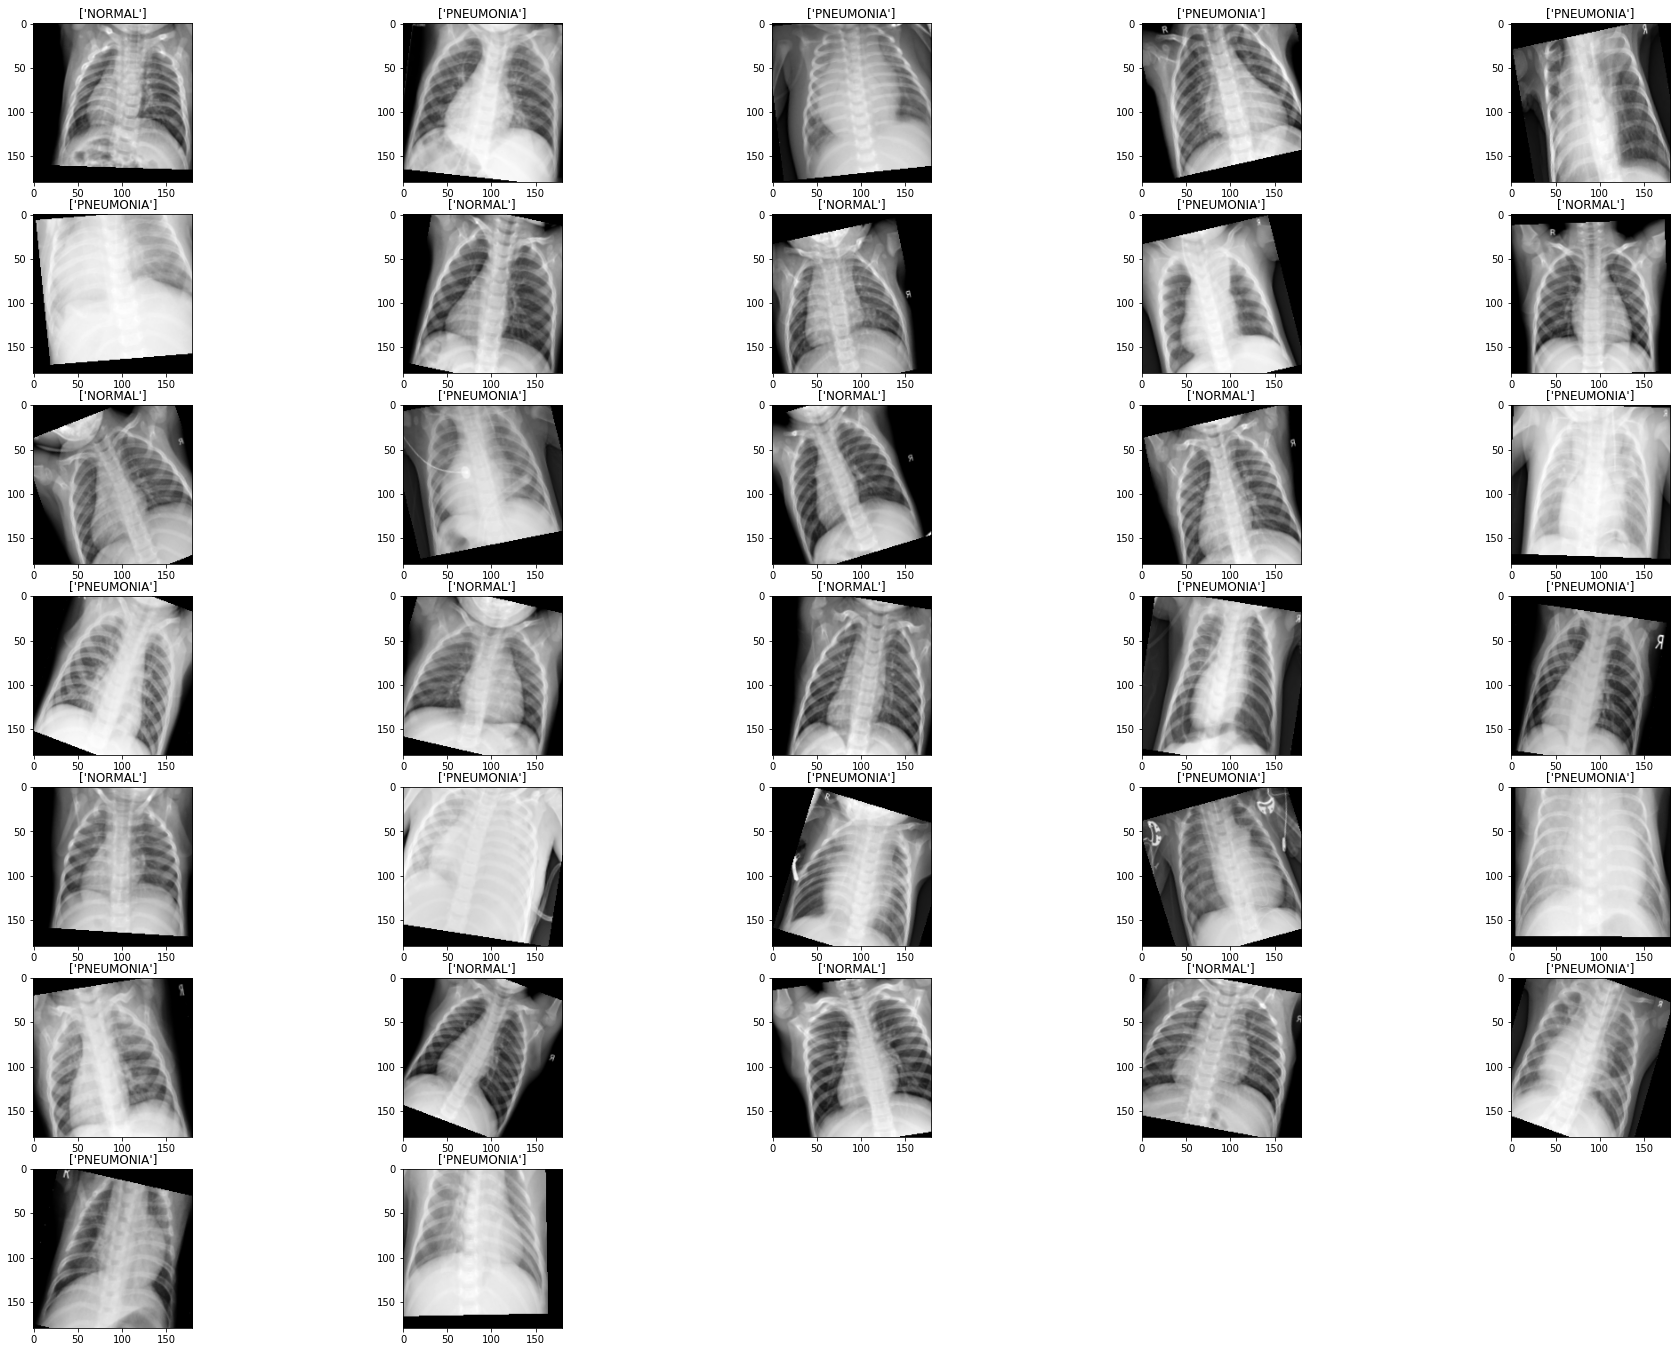

In [29]:
#Displaying sample of Augmented data
Xbatch,Ybatch = train_flow.__getitem__(0)
plt.figure(figsize = (32,24))
for ii in range(batch_size):
    plt.subplot(7,5,ii+1)
    temp=Xbatch[ii].reshape(180,180)#dropping the channel axis
    plt.imshow(temp, cmap = "gray")
    plt.title(le.inverse_transform([int(Ybatch[ii].argmax())]))#using inverse of the label encoder to find the label
plt.show()

## 4) Defining Callbacks


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ZeroPadding2D

import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

In [31]:
model_name_prevgg16 = "MyDrive/MyDrive/ENEL-645/models/team_8_PT_VGG16.h5"

# define your callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)
monitor = tf.keras.callbacks.ModelCheckpoint(model_name_prevgg16, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# learning rate scheduler
def scheduler(epoch, lr):
    if epoch % 10 == 0: # LEARNING RATE SCHEDULER EPOCH NUMBER
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

## 5) Models

#### 5.1.1) Definition

In [32]:
# Load pre-trained model (InceptionV3 without the top)
from keras.layers import Input, Concatenate
from keras.applications.vgg16 import VGG16

img_size_target = 180
img_input = Input(shape=(img_size_target, img_size_target, 1))
img_conc = Concatenate()([img_input, img_input, img_input])  

model_vgg16 = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    # input_shape=(180, 180, 3),
    include_top=False,
    input_tensor=img_conc
    )

model_input= model_vgg16.output
model_input= Flatten()(model_input)
model_input= Dense(2, activation='softmax')(model_input)
model = tf.keras.Model(inputs = model_vgg16.input, outputs = model_input)
model.summary()

for layer in model.layers[0:20]:
    layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 1) 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 180, 180, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 180, 180, 64) 1792        concatenate[0][0]                
_____________________________

In [33]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), # LEARNING RATE
    loss='categorical_crossentropy', 
    # metrics = ['accuracy', recall_metric]
    metrics = ['accuracy'],
    )

#### 5.1.2) Train 

In [34]:
model.fit(train_flow,
          batch_size = 32, # BATCH SIZE
          epochs= 100,     # EPOCHS
          verbose= 1, 
          callbacks= [early_stop, monitor, lr_schedule], 
          validation_data=val_flow
          )

# without data augmentation
# model.fit(Xtrain, Y_train_oh,
#           batch_size = 32, # BATCH SIZE
#           epochs= 100,     # EPOCHS
#           verbose= 1, 
#           callbacks= [early_stop, monitor, lr_schedule], 
#           validation_data = (Xval, Y_val_oh)
#           )

Epoch 1/100
59/59 [==============================] - 47s 175ms/step - loss: 1.7723 - accuracy: 0.7371 - val_loss: 0.1811 - val_accuracy: 0.9333
Epoch 2/100
59/59 [==============================] - 8s 139ms/step - loss: 0.2538 - accuracy: 0.9305 - val_loss: 0.1329 - val_accuracy: 0.9519
Epoch 3/100
59/59 [==============================] - 8s 140ms/step - loss: 0.1203 - accuracy: 0.9557 - val_loss: 0.2109 - val_accuracy: 0.9210
Epoch 4/100
59/59 [==============================] - 8s 140ms/step - loss: 0.1647 - accuracy: 0.9362 - val_loss: 0.1601 - val_accuracy: 0.9407
Epoch 5/100
59/59 [==============================] - 8s 140ms/step - loss: 0.1169 - accuracy: 0.9540 - val_loss: 0.1286 - val_accuracy: 0.9543
Epoch 6/100
59/59 [==============================] - 8s 142ms/step - loss: 0.1209 - accuracy: 0.9555 - val_loss: 0.1478 - val_accuracy: 0.9568
Epoch 7/100
59/59 [==============================] - 8s 143ms/step - loss: 0.1018 - accuracy: 0.9676 - val_loss: 0.0876 - val_accuracy: 0.965

#### 5.1.3) Evaluate 

In [35]:
model.load_weights(model_name_prevgg16)
metrics = model.evaluate(Xtest, Y_test_oh)
print("Categorical cross-entropy:", metrics[0])
print("Accuracy:", metrics[1])

20/20 [==============================] - 4s 221ms/step - loss: 0.3572 - accuracy: 0.9006
Categorical cross-entropy: 0.3572387993335724
Accuracy: 0.9006410241127014
